In [1]:
import numpy as np 
import pandas as pd 
import cv2

In [2]:
df = pd.read_csv('../input/facial-expression/fer2013.csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
len(df.iloc[0]['pixels'].split())
# 48 * 48

2304

In [5]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [6]:
import matplotlib.pyplot as plt

In [7]:
img = df.iloc[0]['pixels'].split()

In [8]:
img = [int(i) for i in img]

In [9]:
type(img[0])

int

In [10]:
len(img)

2304

In [11]:
img = np.array(img)

In [12]:
img = img.reshape(48,48)

In [13]:
img.shape

(48, 48)

Text(0.5, 0, '0')

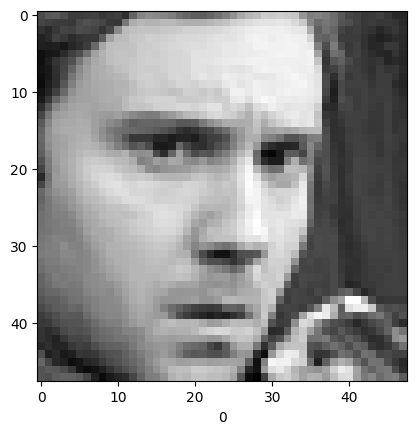

In [14]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [15]:
X = []
y = []

In [16]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y  
    

In [17]:
X, y = getData('../input/facial-expression/fer2013.csv')

In [18]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [19]:
X = np.array(X)/255.0
y = np.array(y)

In [20]:
X.shape, y.shape

((24006, 2304), (24006,))

In [21]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

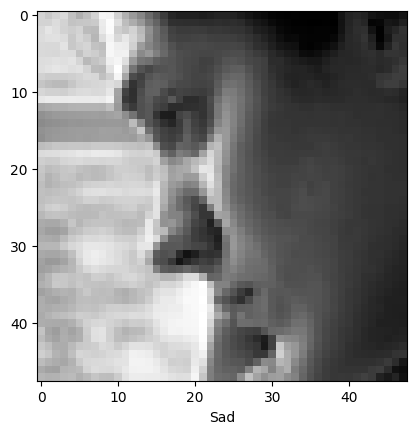

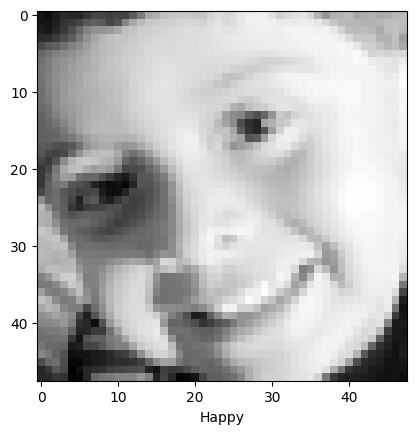

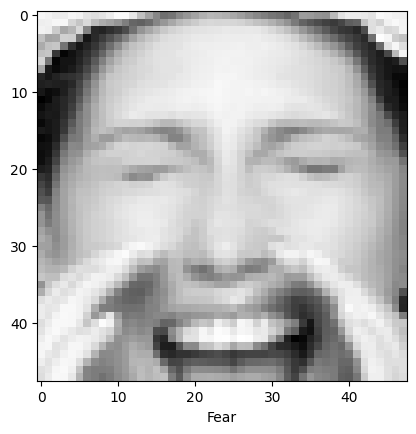

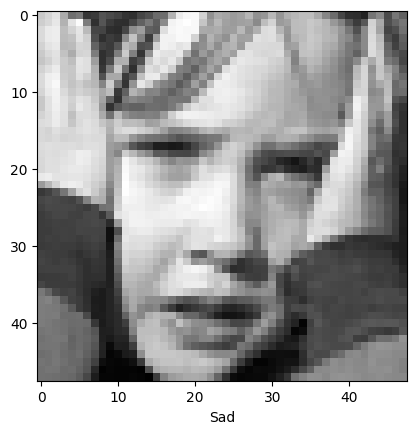

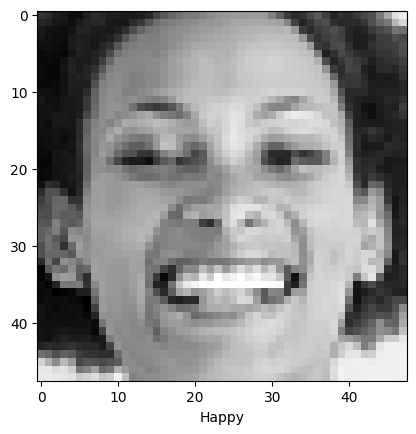

In [22]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [23]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

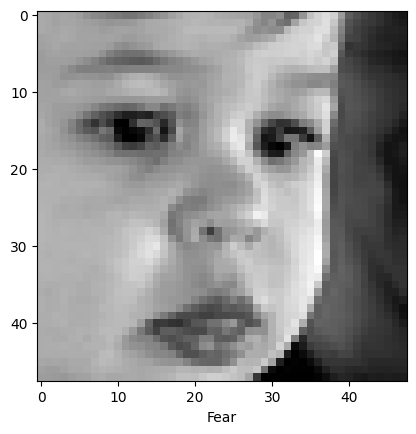

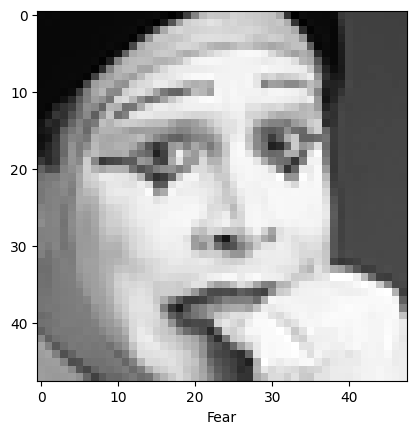

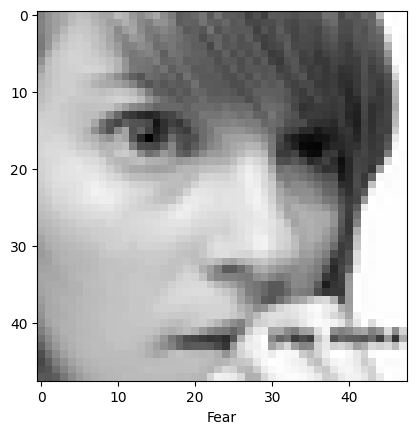

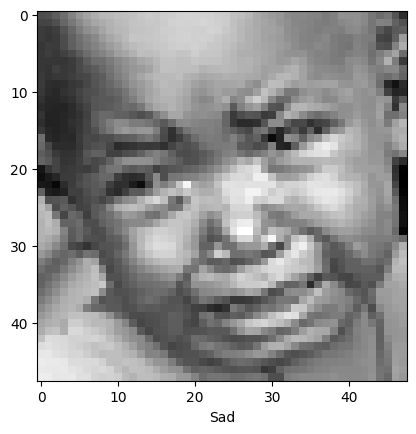

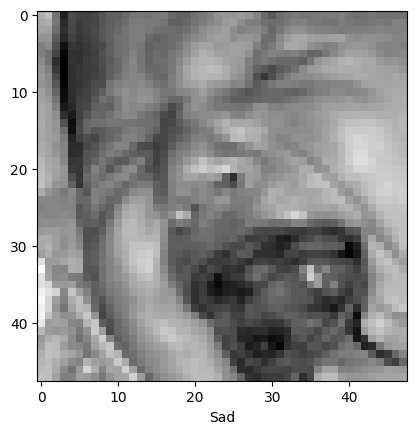

In [24]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [25]:
X = X.reshape(len(X), 48, 48, 1)

In [26]:
X.shape

(24006, 48, 48, 1)

In [27]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [28]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [29]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

model = Sequential()

# First convolutional layer with 32 filters
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten before feeding into dense layers
model.add(Flatten())

# First dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second dense layer with 64 neurons
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer with 10 neurons (for 10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [32]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
301/301 [==============================] - 18s 26ms/step - loss: 2.1638 - accuracy: 0.2380 - val_loss: 2.0636 - val_accuracy: 0.1022
Epoch 2/22
301/301 [==============================] - 7s 23ms/step - loss: 1.7172 - accuracy: 0.3250 - val_loss: 1.8515 - val_accuracy: 0.2659
Epoch 3/22
301/301 [==============================] - 7s 23ms/step - loss: 1.5303 - accuracy: 0.3994 - val_loss: 1.9257 - val_accuracy: 0.2601
Epoch 4/22
301/301 [==============================] - 7s 23ms/step - loss: 1.4144 - accuracy: 0.4481 - val_loss: 1.3739 - val_accuracy: 0.4494
Epoch 5/22
301/301 [==============================] - 7s 23ms/step - loss: 1.3348 - accuracy: 0.4833 - val_loss: 1.5876 - val_accuracy: 0.4188
Epoch 6/22
301/301 [==============================] - 7s 23ms/step - loss: 1.2611 - accuracy: 0.5102 - val_loss: 2.2952 - val_accuracy: 0.1989
Epoch 7/22
301/301 [==============================] - 7s 23ms/step - loss: 1.1737 - accuracy: 0.5464 - val_loss: 1.3061 - val_accuracy: 0.509

In [33]:
model.save('model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
